In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitsio as ft
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils import utils
import numpy as np
import healpy as hp

camb is not installed!


In [2]:
ls /home/mehdi/data/alternative/

dr8_elg_256_5r.npy  elg_ran1024.npy    lrg_ran1024.npy        mask_lrg_256.fits
dr8_elg_256.fits    elg_ran256.fits    lrg_ran256.fits        results_aug9/
dr8_lrg_256_5r.npy  frac_elg_256.fits  mask_elg_256.cut.fits  results_elg/
dr8_lrg_256.fits    frac_lrg_256.fits  mask_elg_256.cut.log   results_lrg/
elg_delta1024.npy   lrg_delta1024.npy  mask_elg_256.fits
elg_gal1024.npy     lrg_gal1024.npy    mask_lrg_256.cut.fits
elg_gal256.fits     lrg_gal256.fits    mask_lrg_256.cut.log


In [3]:
data = ft.read('/home/mehdi/data/alternative/dr8_elg_256.fits')

In [6]:
ra, dec = utils.hpix2radec(256, data['hpind'])
dn, ds, mz = utils.hpix2caps(data['hpind'])

Text(0, 0.5, 'DEC [deg]')

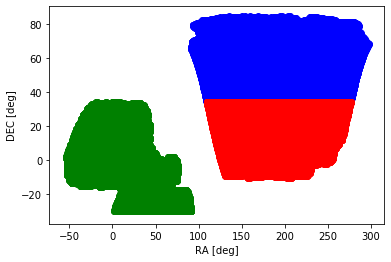

In [8]:
#plt.scatter(ra, dec, color='grey')
plt.scatter(utils.shiftra(ra[mz]), dec[mz], color='b')
plt.scatter(utils.shiftra(ra[dn]), dec[dn], color='r')
plt.scatter(utils.shiftra(ra[ds]), dec[ds], color='g')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

In [9]:
def split_df(sample):    
    data = ft.read(f'/home/mehdi/data/alternative/dr8_{sample}_256.fits')
    dn,ds, mz = utils.hpix2caps(data['hpind'])
    data_dn = data[dn]
    data_ds = data[ds]
    data_mz = data[mz]

    elg  = hp.read_map(f'/home/mehdi/data/alternative/{sample}_gal256.fits', verbose=False)
    frac = hp.read_map(f'/home/mehdi/data/alternative/frac_{sample}_256.fits', verbose=False)

    for name_i,data_i in zip(['decaln', 'decals','bmzls'],
                             [data_dn, data_ds, data_mz]):
        print(sample, name_i, data_i.size)
        hpix_i    = data_i['hpind']
        new_label = utils.makedelta(elg[hpix_i], 
                                        frac[hpix_i],
                                        np.ones(len(hpix_i), '?')
                                   ) + 1
        data_i['label'] = new_label
        ft.write(f'/home/mehdi/data/alternative/dr8_{sample}_{name_i}_256.fits', data_i)

        kfold = utils.split2Kfolds(data_i)
        np.save(f'/home/mehdi/data/alternative/dr8_{sample}_{name_i}_256_5r.npy', kfold)

        mask_i = np.zeros(12*256*256, '?')
        mask_i[data_i['hpind']] = True
        hp.write_map(f'/home/mehdi/data/alternative/mask_{sample}_{name_i}_256.fits', mask_i, 
                    dtype=np.float64, fits_IDL=False)

    #     frac_i = np.zeros(12*256*256)
    #     frac_i[data_i['hpind']] = data_i['fracgood']
    #     hp.write_map(f'/home/mehdi/data/alternative/frac_{sample}_{name_i}_256.fits', frac_i, 
    #                 dtype=np.float64, fits_IDL=False)   

In [10]:
split_df('elg')
split_df('lrg')

elg decaln 111613
elg decals 107298
elg bmzls 85145
lrg decaln 111583
lrg decals 107500
lrg bmzls 85059


In [12]:
ls /home/mehdi/data/alternative/*elg*

/home/mehdi/data/alternative/dr8_elg_256_5r.npy
/home/mehdi/data/alternative/dr8_elg_256.fits
/home/mehdi/data/alternative/dr8_elg_bmzls_256_5r.npy
/home/mehdi/data/alternative/dr8_elg_bmzls_256.fits
/home/mehdi/data/alternative/dr8_elg_decaln_256_5r.npy
/home/mehdi/data/alternative/dr8_elg_decaln_256.fits
/home/mehdi/data/alternative/dr8_elg_decals_256_5r.npy
/home/mehdi/data/alternative/dr8_elg_decals_256.fits
/home/mehdi/data/alternative/elg_delta1024.npy
/home/mehdi/data/alternative/elg_gal1024.npy
/home/mehdi/data/alternative/elg_gal256.fits
/home/mehdi/data/alternative/elg_ran1024.npy
/home/mehdi/data/alternative/elg_ran256.fits
/home/mehdi/data/alternative/frac_elg_256.fits
/home/mehdi/data/alternative/mask_elg_256.cut.fits
/home/mehdi/data/alternative/mask_elg_256.cut.log
/home/mehdi/data/alternative/mask_elg_256.fits
/home/mehdi/data/alternative/mask_elg_bmzls_256.fits
/home/mehdi/data/alternative/mask_elg_decaln_256.fits
/home/mehdi/data/alternative/mask_elg_decals_256.fits



In [2]:
from LSSutils import dataviz

In [4]:
help(dataviz.ablation_plot_all)

Help on function ablation_plot_all in module LSSutils.dataviz:

ablation_plot_all(files, labels=None, title=None, saveto=None, hold=False)



In [ ]:
ls /home/mehdi/data/alternative/results_elg/regression_decaln/nn_ab/nn-weights.hp256.fits

In [6]:
from glob import glob

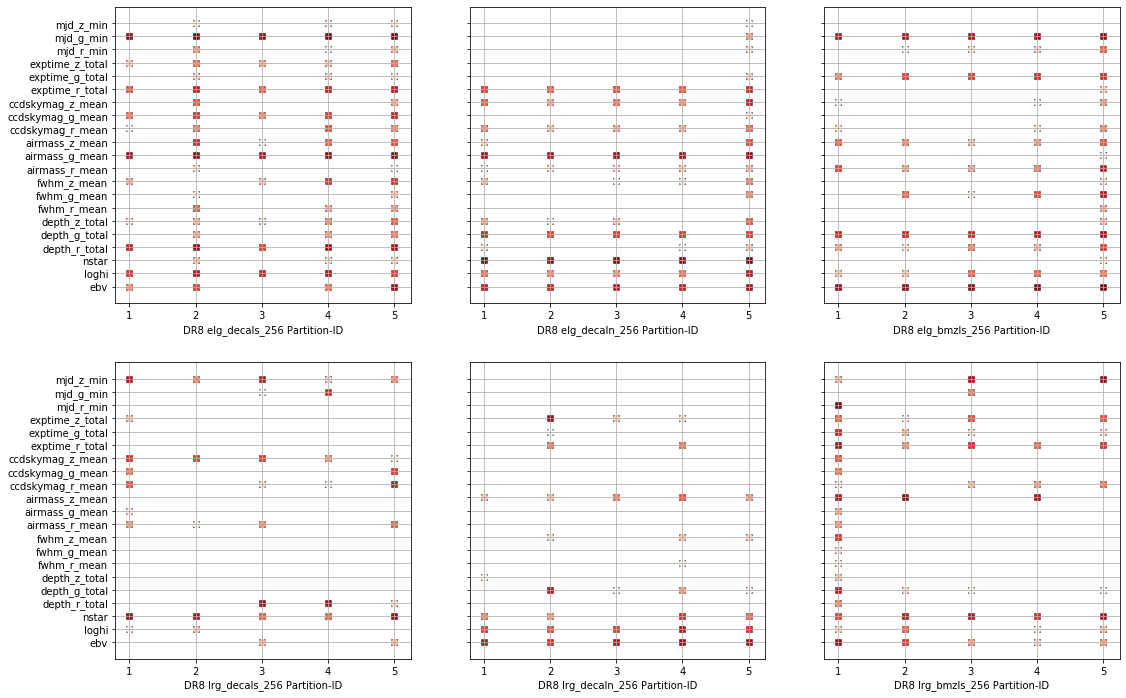

In [9]:
from LSSutils.dataviz import ablation_plot_all, get_selected_maps
from LSSutils.catalogs.datarelease import cols_dr8 as labels
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(18, 12), sharey=True)
ax = ax.flatten()

i = 0
for cap in [ 'elg', 'lrg']: # ngc.all
    for key in ['decals','decaln', 'bmzls']:
        mycap = cap+'_'+key+'_'+'256' # NGC_0.8
        get_selected_maps(glob(f'/home/mehdi/data/alternative/results_{cap}/ablation_{key}/dr8.log_fold*.npy'),
                          ['DR8 '+mycap], labels=labels, ax=ax[i], hold=True)
        i += 1
#plt.savefig('./maps_selected_eboss.pdf', bbox_inches='tight')
plt.show()   

1171.2478866399144 -2.8334042564870376
1105.4540687781266 -8.817010283178606
1246.1504111200284 -5.3743515260362695
1057.120319692204 -4.617147955557899
1216.1728410430394 -0.9314288549244765


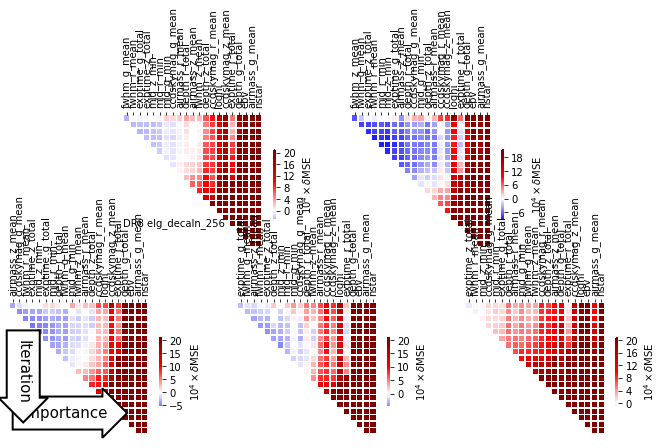

884.7096849379876 -8.518005248459026
837.6109701877588 -0.1261406334596149
800.2392030232253 -6.625591592555047
900.3025296882328 -0.20351537665219688
947.9871624052083 0.0


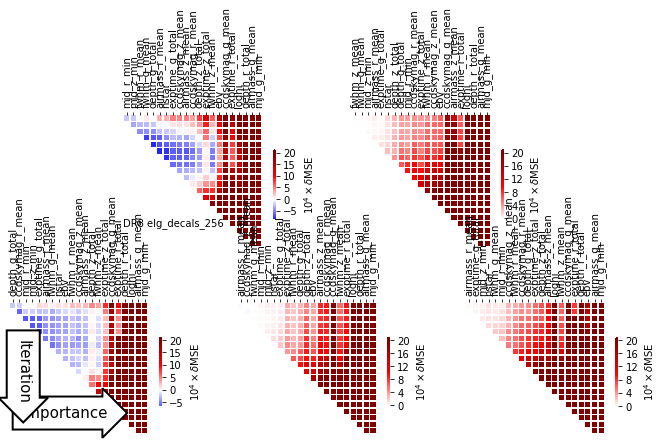

910.443888760406 -4.012247533148328
891.5741961707236 -5.773092534975266
886.6846323502298 -8.198072568784687
894.0827223820546 -3.1570854178186725
883.475798303539 -1.3573806183742043


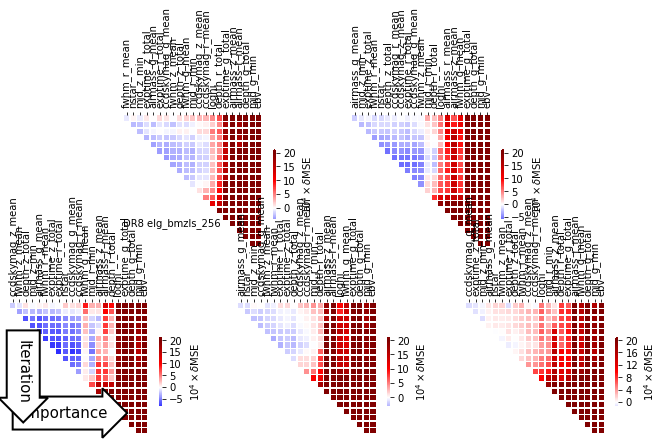

35.93967409628141 -7.999058988105157
36.08872494939908 -2.785662076508766
37.544168797989386 -10.681801034934102
51.760729147798386 -4.9594904539673745
38.10492251848263 -5.929836885731898


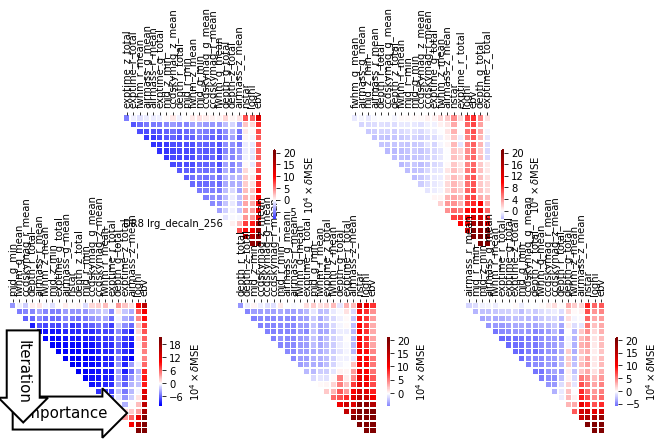

39.35233388100201 -1.5847868990259695
19.687487047705954 -8.335196517800236
31.24864108233094 -5.082232358589733
30.813838059837728 -6.906367516306133
32.45133682109991 -5.542718418890535


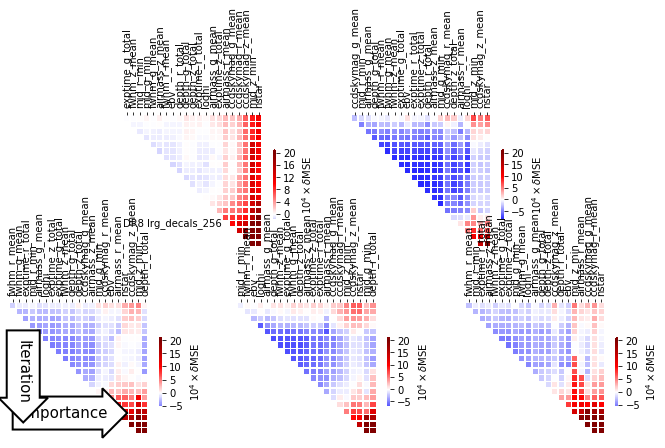

129.31604336813064 -8.673371640330885
114.73022155532364 -5.35146509895057
97.42685070985414 -5.068767922444817
93.04424034839664 -6.919425069253915
99.09099381367525 -4.172220108425995


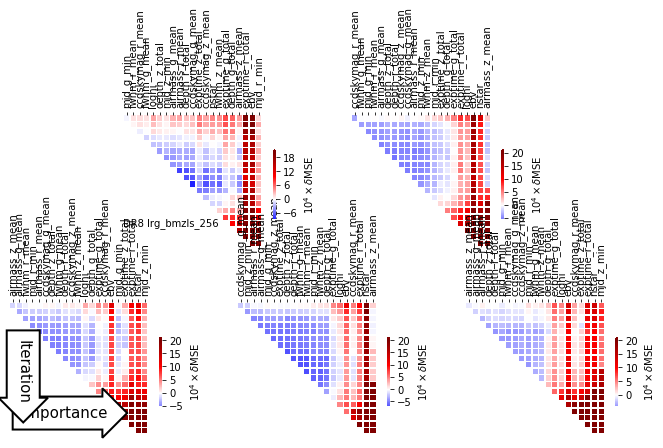

In [8]:
i = 0
for cap in [ 'elg', 'lrg']: # ngc.all
    for key in ['decaln', 'decals', 'bmzls']:
        mycap = cap+'_'+key+'_'+'256' # NGC_0.8
        ablation_plot_all(glob(f'/home/mehdi/data/alternative/results_{cap}/ablation_{key}/dr8.log_fold*.npy'),
                          title='DR8 '+mycap, labels=labels)
        i += 1
#plt.savefig('./maps_selected_eboss.pdf', bbox_inches='tight')
plt.show()   

In [11]:
weights = glob('/home/mehdi/data/alternative/results_*/regression_*/nn_*/nn-weights.hp256.fits')
len(weights)

12

In [12]:
for wi in weights:
    di = hp.read_map(wi, verbose=False)
    nan = np.isnan(di)
    print(np.percentile(di[~nan], [0, 50, 100]))

[0.21007386 1.00480501 1.42614474]
[0.41903098 1.00650838 1.35410036]
[0.64569088 0.98864934 1.75721995]
[0.6468414  0.98969305 1.8100089 ]
[0.63286712 1.01227461 1.35468111]
[0.54019145 1.01184882 1.66983764]
[0.73290418 0.9996257  1.52736269]
[0.61917974 0.99681907 1.37131762]
[0.61936391 0.99884371 1.76227584]
[0.47409768 0.99773751 1.35952218]
[0.57012267 1.00027557 1.22910014]
[0.5559771  1.00178707 1.37189809]


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [2]:
from LSSutils import dataviz

In [5]:
from LSSutils.catalogs.datarelease import cols_dr8 as xlabels
xlabels

['ebv',
 'loghi',
 'nstar',
 'depth_r_total',
 'depth_g_total',
 'depth_z_total',
 'fwhm_r_mean',
 'fwhm_g_mean',
 'fwhm_z_mean',
 'airmass_r_mean',
 'airmass_g_mean',
 'airmass_z_mean',
 'ccdskymag_r_mean',
 'ccdskymag_g_mean',
 'ccdskymag_z_mean',
 'exptime_r_total',
 'exptime_g_total',
 'exptime_z_total',
 'mjd_r_min',
 'mjd_g_min',
 'mjd_z_min']

In [14]:
plt.rc('font', family='sans-serif', size=20)

327.7  1  327.7
2.7  1  2.7
7.4  1  7.4
3.4  1  3.4
455.6  1  455.6
7.3  1  7.3


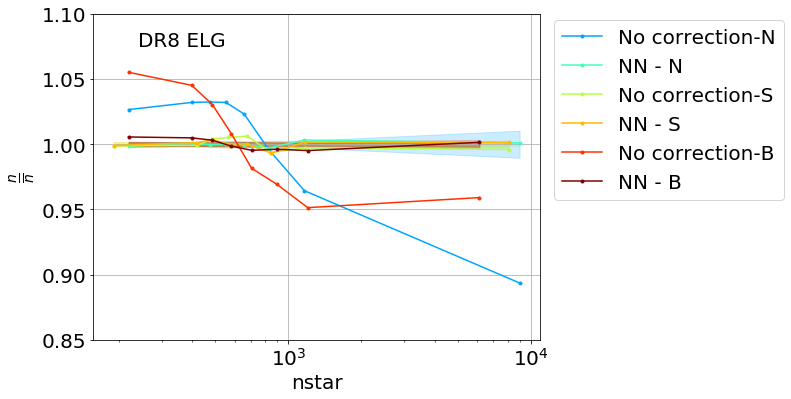

In [26]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

dataviz.plot_nnbar([
                    '/home/mehdi/data/alternative/results_elg/clustering_decaln/nnbar_elg_uni_decaln.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decaln/nnbar_elg_nn_ab_decaln.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decals/nnbar_elg_uni_decals.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decals/nnbar_elg_nn_ab_decals.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_bmzls/nnbar_elg_uni_bmzls.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_bmzls/nnbar_elg_nn_ab_bmzls.npy',
                      ],
               title='DR8 ELG',
               lb=[
                   'No correction-N', 
                   'NN - N',
                   'No correction-S', 
                   'NN - S',
                   'No correction-B', 
                   'NN - B'                   
                   ],
               axes=[2], 
               figax=(fig, [ax]),
               cl=plt.cm.jet,
               hold=True) 
ax.set(xscale='log', xlabel='nstar', ylim=(0.85, 1.1))
ax.legend(bbox_to_anchor=(1.01, 1.01))

327.7  1  327.7
8.0  1  8.0
8.0  1  8.0
9.0  1  9.0
445.3  1  445.3
1.9  1  1.9


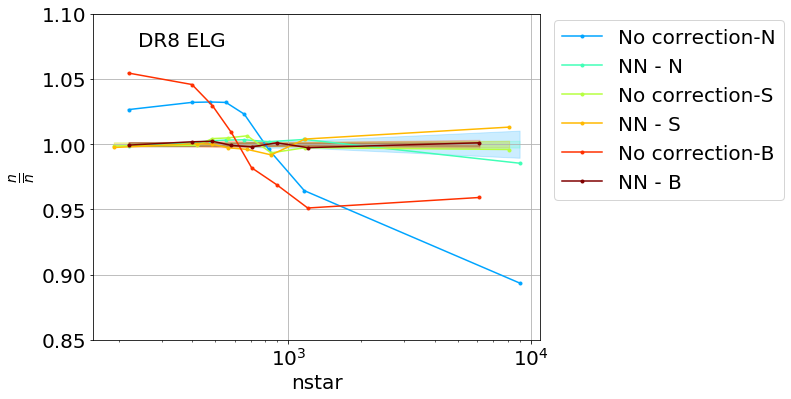

In [36]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

dataviz.plot_nnbar([
                    '/home/mehdi/data/alternative/results_elg/clustering_decaln/nnbar_elg_uni_decaln.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decaln/nnbar_elg_nn_p_all_decaln.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decals/nnbar_elg_uni_decals.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_decals/nnbar_elg_nn_p_all_decals.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_bmzls/nnbar_elg_uni_bmzls.npy',
                    '/home/mehdi/data/alternative/results_elg/clustering_bmzls/nnbar_elg_nn_p_all_bmzls.npy',
                      ],
               title='DR8 ELG',
               lb=[
                   'No correction-N', 
                   'NN - N',
                   'No correction-S', 
                   'NN - S',
                   'No correction-B', 
                   'NN - B'                   
                   ],
               axes=[2], 
               figax=(fig, [ax]),
               cl=plt.cm.jet,
               hold=True) 
ax.set(xscale='log', xlabel='nstar', ylim=(0.85, 1.1))
ax.legend(bbox_to_anchor=(1.01, 1.01))

19.9  1  19.9
4.0  1  4.0
4.3  1  4.3
1.1  1  1.1
7.8  1  7.8
1.6  1  1.6


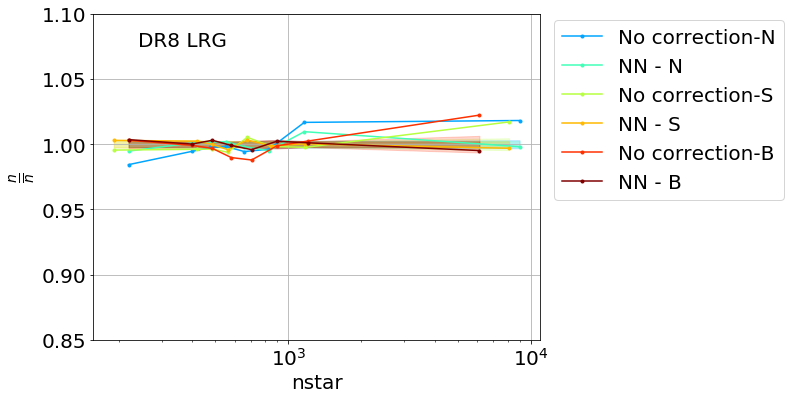

In [37]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

dataviz.plot_nnbar([
                    '/home/mehdi/data/alternative/results_lrg/clustering_decaln/nnbar_lrg_uni_decaln.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decaln/nnbar_lrg_nn_p_all_decaln.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decals/nnbar_lrg_uni_decals.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decals/nnbar_lrg_nn_p_all_decals.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_bmzls/nnbar_lrg_uni_bmzls.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_bmzls/nnbar_lrg_nn_p_all_bmzls.npy',
                      ],
               title='DR8 LRG',
               lb=[
                   'No correction-N', 
                   'NN - N',
                   'No correction-S', 
                   'NN - S',
                   'No correction-B', 
                   'NN - B'                   
                   ],
               axes=[2], 
               figax=(fig, [ax]),
               cl=plt.cm.jet,
               hold=True) 
ax.set(xscale='log', xlabel='nstar', ylim=(0.85, 1.1))
ax.legend(bbox_to_anchor=(1.01, 1.01))

20.4  1  20.4
5.4  1  5.4
5.1  1  5.1
2.1  1  2.1
8.2  1  8.2
3.4  1  3.4


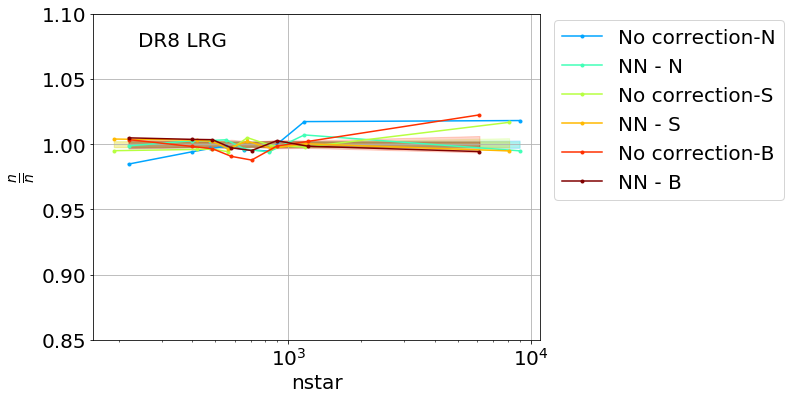

In [18]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))

dataviz.plot_nnbar([
                    '/home/mehdi/data/alternative/results_lrg/clustering_decaln/nnbar_lrg_uni_decaln.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decaln/nnbar_lrg_nn_p_decaln.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decals/nnbar_lrg_uni_decals.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_decals/nnbar_lrg_nn_p_decals.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_bmzls/nnbar_lrg_uni_bmzls.npy',
                    '/home/mehdi/data/alternative/results_lrg/clustering_bmzls/nnbar_lrg_nn_p_bmzls.npy',
                      ],
               title='DR8 LRG',
               lb=[
                   'No correction-N', 
                   'NN - N',
                   'No correction-S', 
                   'NN - S',
                   'No correction-B', 
                   'NN - B'                   
                   ],
               axes=[2], 
               figax=(fig, [ax]),
               cl=plt.cm.jet,
               hold=True) 
ax.set(xscale='log', xlabel='nstar', ylim=(0.85, 1.1))
ax.legend(bbox_to_anchor=(1.01, 1.01))

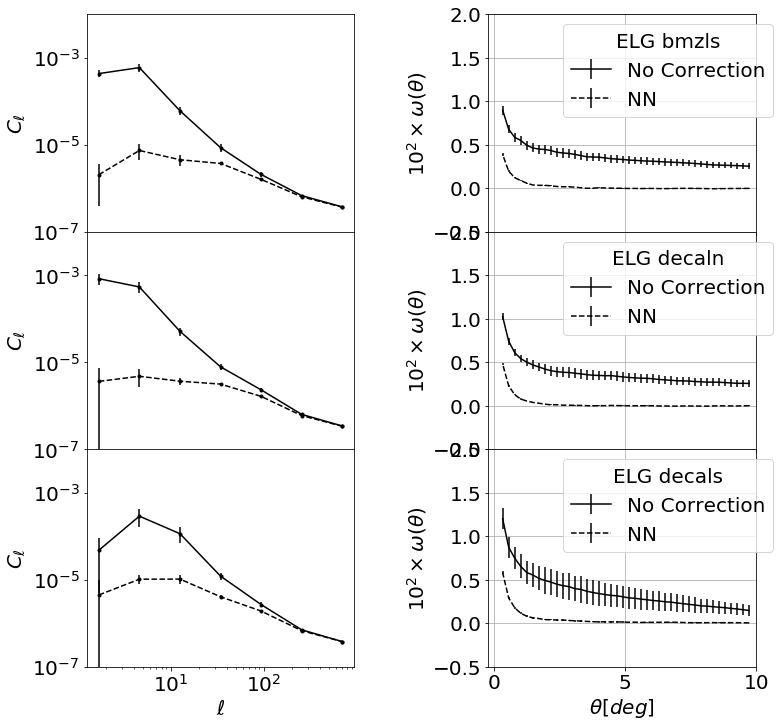

In [35]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12), 
                       sharex='col')
fig.subplots_adjust(hspace=0, wspace=0.5)
ax = ax.flatten()
# plt.subplots_adjust(hspace=0.0)

l = 'elg'
for i, t in enumerate(['bmzls', 'decaln', 'decals']):
    kw     = dict(lb    = ['uni', 'nn_p'],
                  lt    = ['No Correction', 'NN'], 
                  c     = ['k', 'k', 'purple', 'royalblue', 'crimson', 'olive', 'g', 'darkorange'],
                  ls    = 2*['-', '--', '-', '-.', '--', '-'],
                  mk    = 2*['.', 'o', '^', 'x'],
                  title = l.upper()+' '+t)    
    filen  = lambda lb:'/home/mehdi/data/alternative/results_'+l+'/clustering_'+t+'/cl_'\
                        +l+'_'+lb+'_'+t+'.npy'
    filen2 = lambda lb:'/home/mehdi/data/alternative/results_'+l+'/clustering_'+t+'/xi_'\
                        +l+'_'+lb+'_'+t+'.npy'
    dataviz.plot_clxi(filen, filen2, [ax[2*i], ax[2*i+1]], kw, hold=True)
plt.show() 

In [24]:
d = np.load('/home/mehdi/data/alternative/results_elg/clustering_decaln/cl_elg_nn_ab_decaln.npy', allow_pickle=True)

In [25]:
d

array({'cross': array([[5.84299712e-19, 3.42169936e-02, 6.03593863e-02, ...,
        2.59043958e-07, 2.64706031e-07, 2.63054902e-07],
       [2.51510234e-20, 4.35765306e-06, 1.83009190e-05, ...,
        3.33025879e-11, 3.38911231e-11, 3.16684250e-11],
       [5.37152803e-16, 4.48427321e-02, 1.34084577e-01, ...,
        4.86890465e-07, 5.29354055e-07, 5.32828025e-07],
       ...,
       [4.13757290e-19, 1.98902556e-06, 2.82154711e-06, ...,
        1.35305831e-10, 1.45043201e-10, 1.36103013e-10],
       [2.96226760e-21, 1.41451046e-06, 2.46244157e-06, ...,
        8.68524467e-11, 8.50397701e-11, 8.19782227e-11],
       [1.27055995e-18, 1.55390525e-06, 2.96865482e-06, ...,
        6.15191422e-11, 6.11563611e-11, 6.21920730e-11]]), 'auto': None, 'clabels': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'], 'sf': 0.14164047069591662},
      dtype=object)